<a href="https://colab.research.google.com/github/YourStarsWereBad/Customer-Shopping/blob/main/Customer_Shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [24]:
from google.colab import files
uploaded = files.upload()

Saving customer_shopping_data.csv to customer_shopping_data (1).csv


In [25]:
df = pd.read_csv('customer_shopping_data.csv')

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [26]:
df['sales'] = df['price'] * df['quantity']

In [27]:
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 99457
Number of columns: 11


In [28]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul,105.57


In [29]:
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 99457
Number of columns: 11


In [30]:
print(df.isnull().sum())

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
sales             0
dtype: int64


In [31]:
print(df.duplicated().sum())

0


In [32]:
df.drop_duplicates()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [33]:
df.describe()

,age,quantity,price,sales
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2528.789268
std,14.990054,1.413025,941.184567,4222.475781
min,18.000000,1.000000,5.230000,5.230000
25%,30.000000,2.000000,45.450000,136.350000
50%,43.000000,3.000000,203.300000,600.170000
75%,56.000000,4.000000,1200.320000,2700.720000
max,69.000000,5.000000,5250.000000,26250.000000


In [34]:
print("Unique invoice_no:", df.invoice_no.nunique())
print("Unique customer_id:", df.customer_id.nunique())
print("Count record by gender:", df.groupby('gender')["invoice_no"].nunique())
print("Unique category:", df.category.nunique())
print("Count record by payment method:", df.groupby('payment_method')["invoice_no"].nunique())
print("Unique shopping mall:", df.shopping_mall.nunique())

Unique invoice_no: 99457
Unique customer_id: 99457
Count record by gender: gender
Female    59482
Male      39975
Name: invoice_no, dtype: int64
Unique category: 8
Count record by payment method: payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: invoice_no, dtype: int64
Unique shopping mall: 10


In [35]:
# Number of records by category

df.groupby("category")["invoice_no"].nunique()

,invoice_no
category,
Books,4981
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Shoes,10034
Souvenir,4999
Technology,4996
Toys,10087


In [36]:
# Number of records by shopping mall

df.groupby("shopping_mall")["invoice_no"].nunique()

,invoice_no
shopping_mall,
Cevahir AVM,4991
Emaar Square Mall,4811
Forum Istanbul,4947
Istinye Park,9781
Kanyon,19823
Mall of Istanbul,19943
Metrocity,15011
Metropol AVM,10161
Viaport Outlet,4914


# Task 2

In [ ]:
numerical_column = 'sales'

if numerical_column in df.columns:
    mean_value = df[numerical_column].mean()
    median_value = df[numerical_column].median()
    standard_deviation_value = df[numerical_column].std()
    minimum_value = df[numerical_column].min()
    maximum_value = df[numerical_column].max()
    quartiles_value = df[numerical_column].quantile([0.25, 0.5, 0.75])

    print(f"Statistics Of Customer Shopping for '{numerical_column}':")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Standard Deviation: {standard_deviation_value:.2f}")
    print(f"Minimum: {minimum_value:}")
    print(f"Maximum: {maximum_value:}")
    print(f"Quartiles: {quartiles_value:}")

Statistics Of Customer Shopping for 'sales':
Mean: 2528.79
Median: 600.17
Standard Deviation: 4222.48
Minimum: 5.23
Maximum: 26250.0
Quartiles: 0.25     136.35
0.50     600.17
0.75    2700.72
Name: sales, dtype: float64


In [ ]:

Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['sales'] < lower_bound) | (df['sales'] > upper_bound)]

print (f"Number of outliers in 'sales': {outliers.shape[0]}")

Number of outliers in 'sales': 13986


In [ ]:
invalid_prices = df[df['sales'] < 0]

if not invalid_prices.empty:
    print("There are invalid sales in the dataset and isn't valid.")
    print(invalid_prices)
else:
    print("✅ All sales are valid.")

✅ All sales are valid.


# Task 3

In [37]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [39]:
# convert date column from string to date datatype

df["date"] = pd.to_datetime(df["invoice_date"], format="%d/%m/%Y")

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,date
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,2022-08-05
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,2021-12-12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,2021-11-09
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,2021-05-16
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,2021-10-24


In [40]:
# date range
print("min date:", df.date.min())
print("max date:", df.date.max())

min date: 2021-01-01 00:00:00
max date: 2023-03-08 00:00:00


<Axes: >

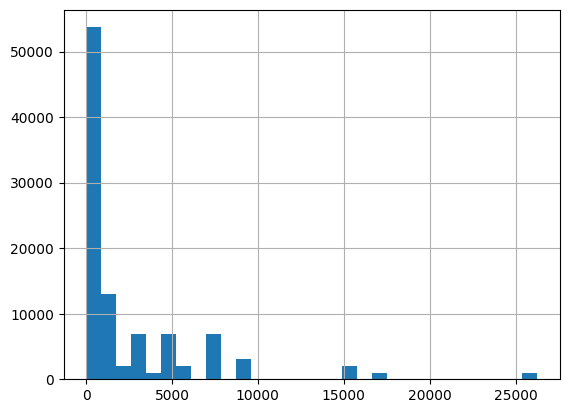

In [42]:
# Calculate sales amount

df["sales_amount"] = df["quantity"] * df["price"]

df["sales_amount"].hist(bins=30)

In [43]:
# get month
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,date,sales_amount,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,2022-08-05,7502.00,2022-08-01
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,2021-12-12,5401.53,2021-12-01
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,2021-11-09,300.08,2021-11-01
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,2021-05-16,15004.25,2021-05-01
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,2021-10-24,242.40,2021-10-01


In [44]:
# 1. Aggregate by month
monthly_sales = df.groupby('month')['sales_amount'].sum().reset_index()
category_sales = df.groupby(['month', 'category'])['sales_amount'].sum().reset_index()
mall_sales = df.groupby(['month', 'shopping_mall'])['sales_amount'].sum().reset_index()

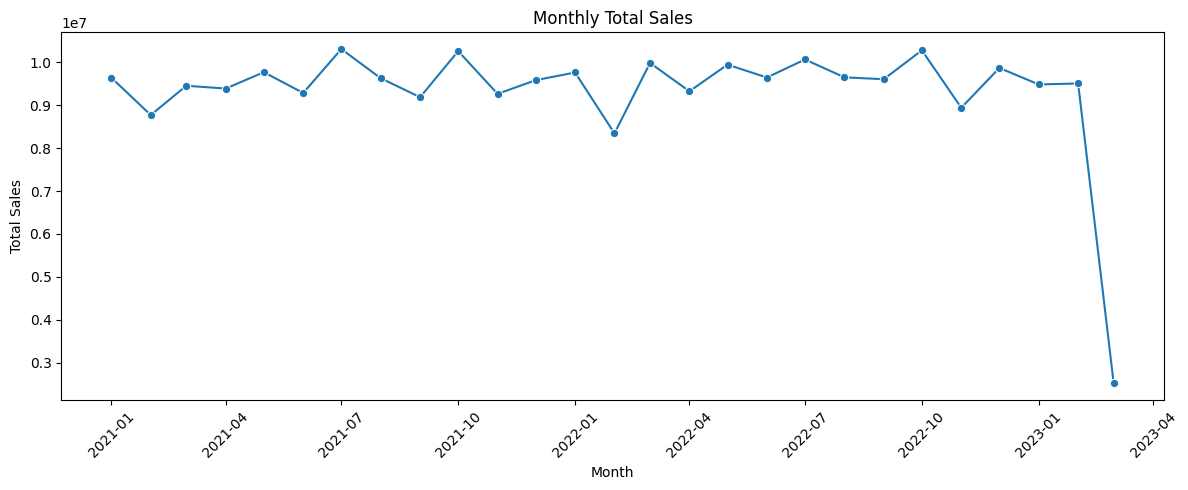

In [45]:
#2. Plotting total month sales

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='month', y='sales_amount', marker='o')
plt.title('Monthly Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

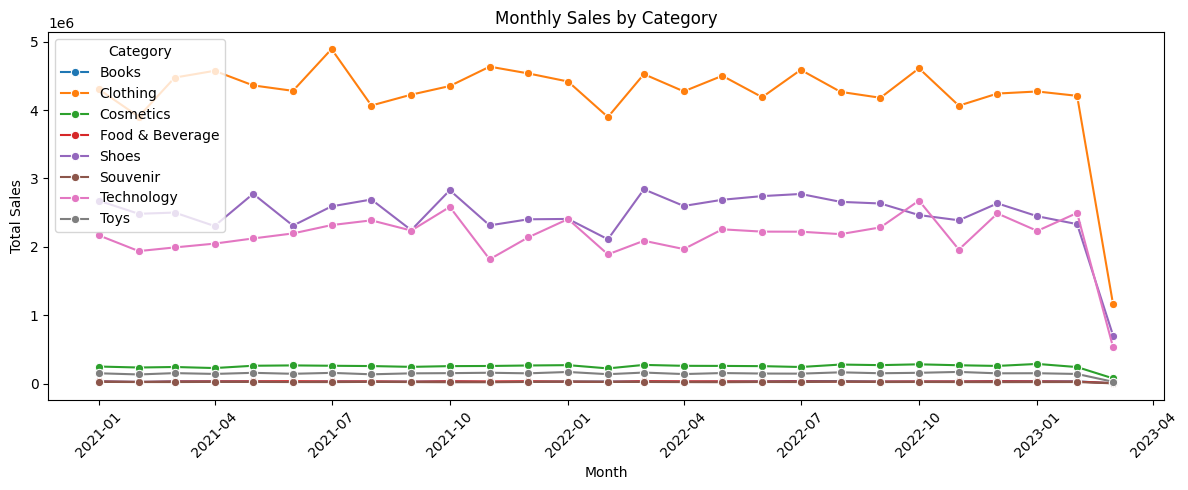

In [46]:
# 3. Plot sales trends by category
plt.figure(figsize=(12, 5))
sns.lineplot(data=category_sales, x='month', y='sales_amount', hue='category', marker='o')
plt.title('Monthly Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

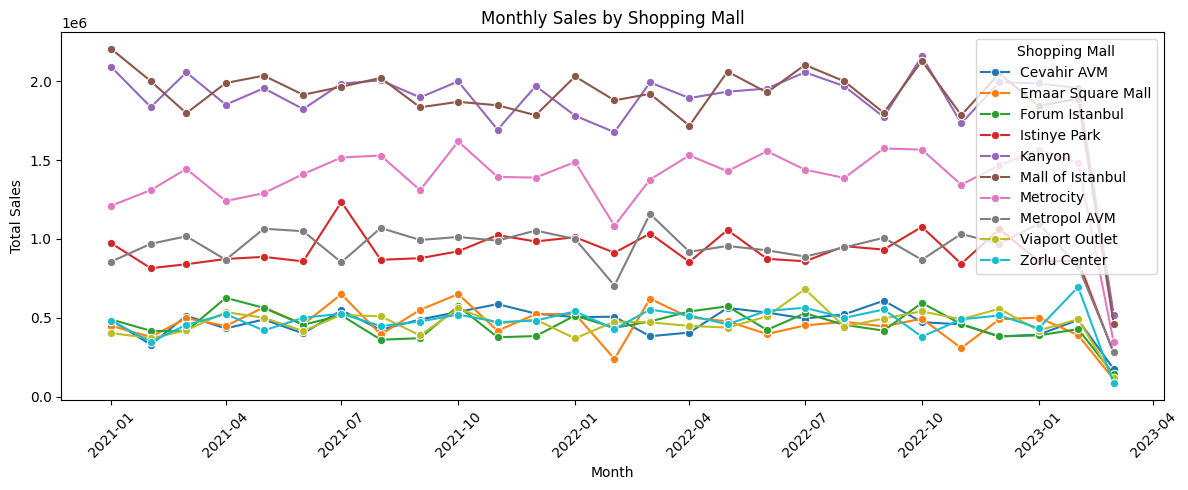

In [47]:
# 4. Plot sales trends by shopping mall
plt.figure(figsize=(12, 5))
sns.lineplot(data=mall_sales, x='month', y='sales_amount', hue='shopping_mall', marker='o')
plt.title('Monthly Sales by Shopping Mall')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Shopping Mall')
plt.tight_layout()
plt.show()

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore

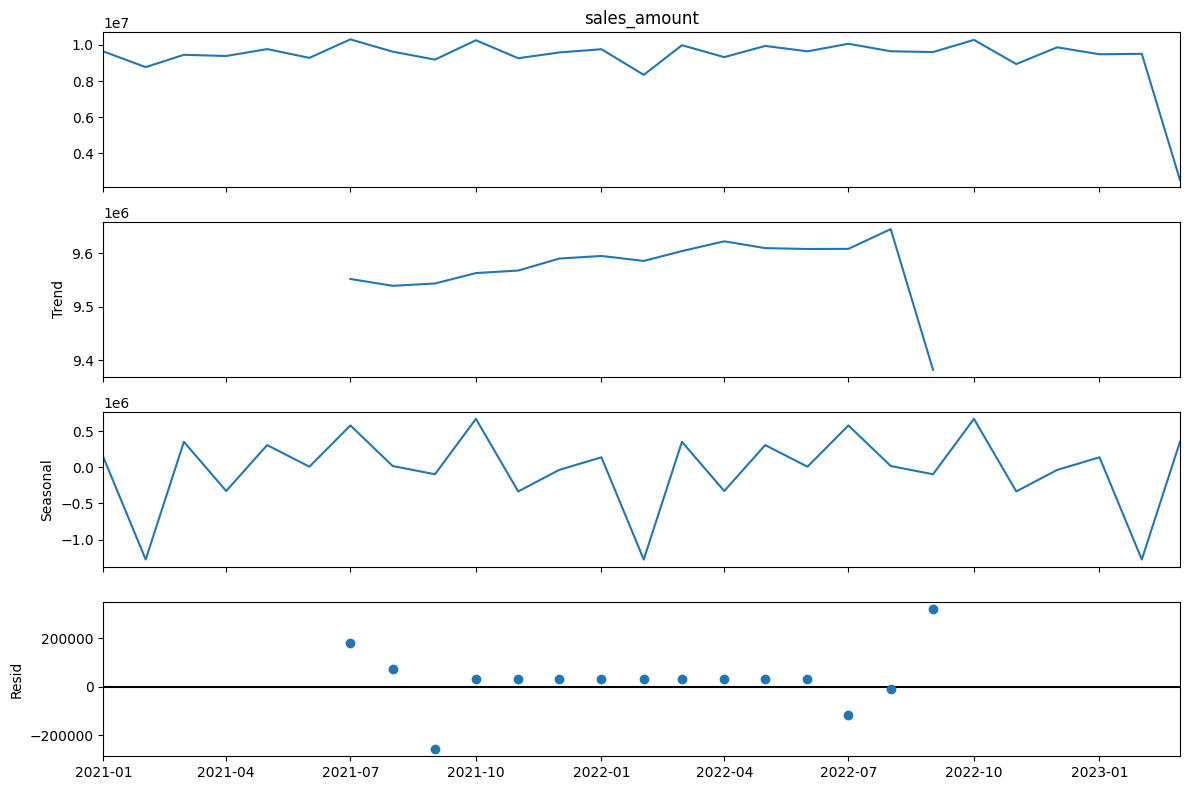

In [49]:
# 5. Seasonal Decomposition (on total sales)
monthly_sales_ts = monthly_sales.set_index('month')['sales_amount']
decomposition = seasonal_decompose(monthly_sales_ts, model='additive', period=12)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()

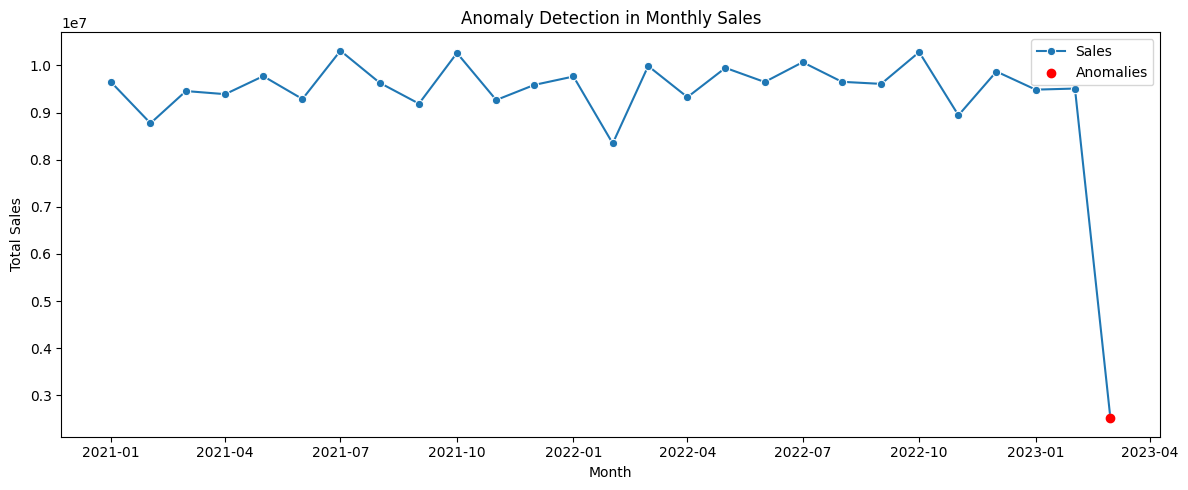

In [50]:
# 6. Detect anomalies using Z-score
monthly_sales['z_score'] = zscore(monthly_sales['sales_amount'])
anomalies = monthly_sales[monthly_sales['z_score'].abs() > 2]

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='month', y='sales_amount', marker='o', label='Sales')
plt.scatter(anomalies['month'], anomalies['sales_amount'], color='red', label='Anomalies', zorder=5)
plt.title("Anomaly Detection in Monthly Sales")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
# since the last month is obviously anomaly - we should drop it

print(monthly_sales.shape)
monthly_sales = monthly_sales[monthly_sales["month"] != '2023-03-01']
print(monthly_sales.shape)

(27, 3)
(26, 3)


# Task 4


In [ ]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

    #Counting the number of unique values in each category.

invoice_no: 99457 unique values
customer_id: 99457 unique values
gender: 2 unique values
category: 8 unique values
payment_method: 3 unique values
shopping_mall: 10 unique values


# Task 5

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# This is for the pearson correlation matrix
correlation_matrix = numerical_df.corr(method='pearson')

print(correlation_matrix)


               age  quantity     price     sales
age       1.000000  0.000667  0.001694  0.002731
quantity  0.000667  1.000000  0.344880  0.461173
price     0.001694  0.344880  1.000000  0.962372
sales     0.002731  0.461173  0.962372  1.000000


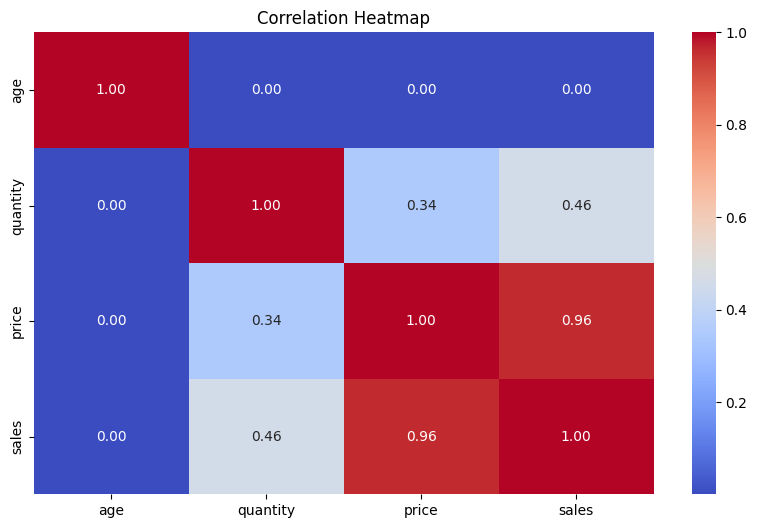

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#Values that are close to 1 or is 1 have strong correlations

# Task 6

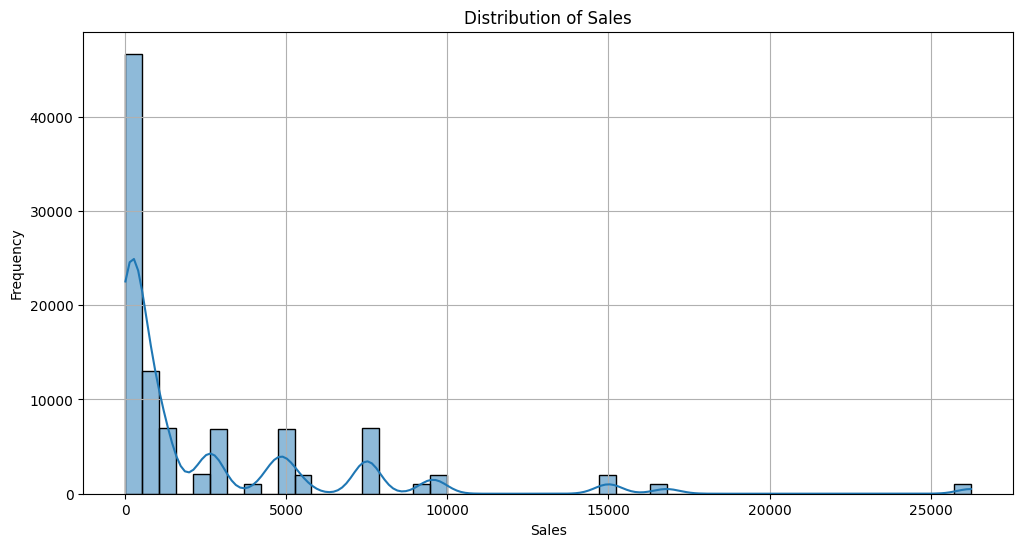

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['sales'], kde=True, bins=50)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

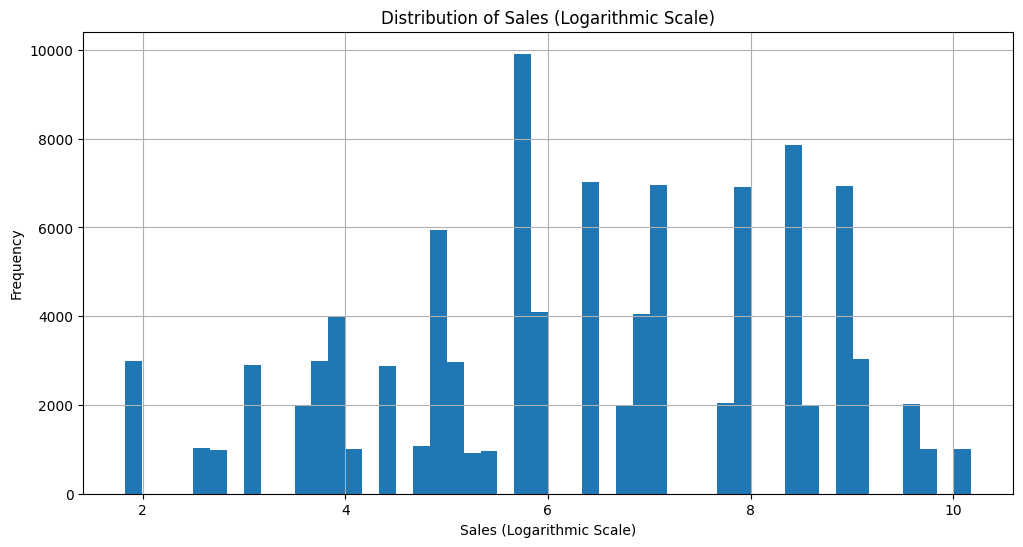

In [ ]:
df['sales_log'] = np.log(df['sales'] + 1)

df['sales_log'].plot(kind='hist', bins=50, figsize=(12, 6))
plt.title('Distribution of Sales (Logarithmic Scale)')
plt.xlabel('Sales (Logarithmic Scale)')
plt.ylabel('Frequency')
plt.grid(True)

# Task 7


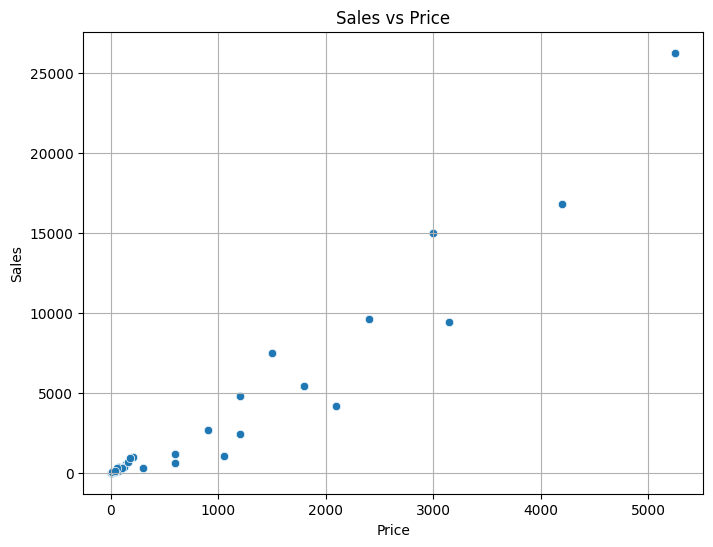

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='sales')
plt.title('Sales vs Price')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

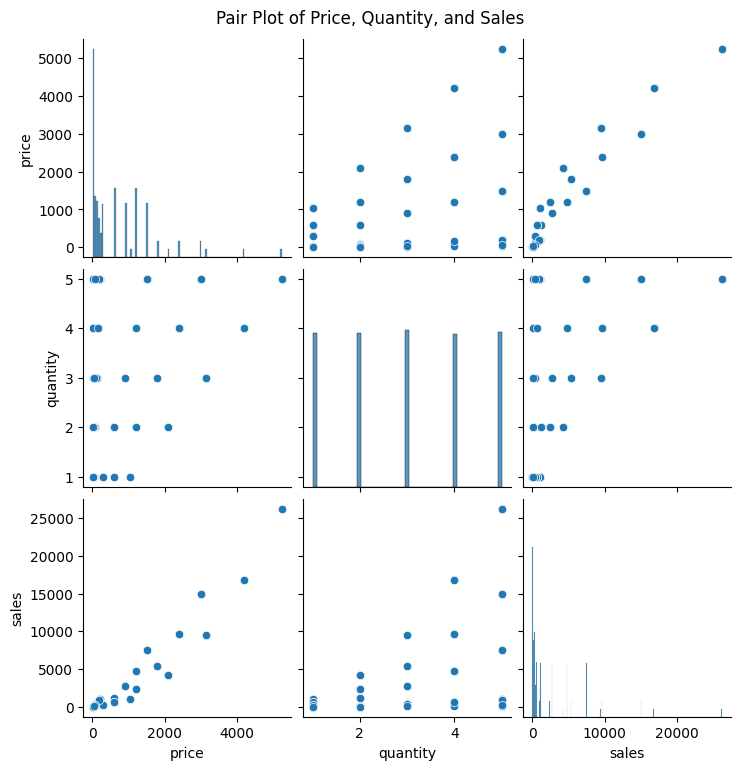

In [ ]:
numerical_cols = ['price', 'quantity', 'sales']

sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Price, Quantity, and Sales', y=1.02)
plt.show()

# Forecasting

In [52]:
# 1. Split train/test
train = monthly_sales[:-6].copy()
test = monthly_sales[-6:].copy()

In [56]:
# 2. SARIMA model

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor

sarima_model = SARIMAX(train['sales_amount'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 3))
sarima_results = sarima_model.fit()
sarima_pred = sarima_results.predict(start=len(train), end=len(train)+len(test)-1)
sarima_pred.index = test['month']

In [57]:
# 3. ML model (XGBoost)
# Create lag features
train_ml = train.copy()
train_ml['month_num'] = train_ml['month'].dt.month
train_ml['year'] = train_ml['month'].dt.year
train_ml['lag_1'] = train_ml['sales_amount'].shift(1)
train_ml['lag_2'] = train_ml['sales_amount'].shift(2)
train_ml = train_ml.dropna()

# Prepare X and y
X_train = train_ml[['month_num', 'year', 'lag_1', 'lag_2']]
y_train = train_ml['sales_amount']

# Fit XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)

# Prepare test data with lag values from end of training
last_rows = train.iloc[-2:].copy()
lags = [last_rows.iloc[-1]['sales_amount'], last_rows.iloc[-2]['sales_amount']]
ml_preds = []
months = []

for i in range(len(test)):
    month = test.iloc[i]['month']
    X_test_row = pd.DataFrame([{
        'month_num': month.month,
        'year': month.year,
        'lag_1': lags[0],
        'lag_2': lags[1]
    }])
    pred = model.predict(X_test_row)[0]
    ml_preds.append(pred)
    months.append(month)
    # Update lags
    lags = [pred] + [lags[0]]

ml_pred = pd.Series(ml_preds, index=months)

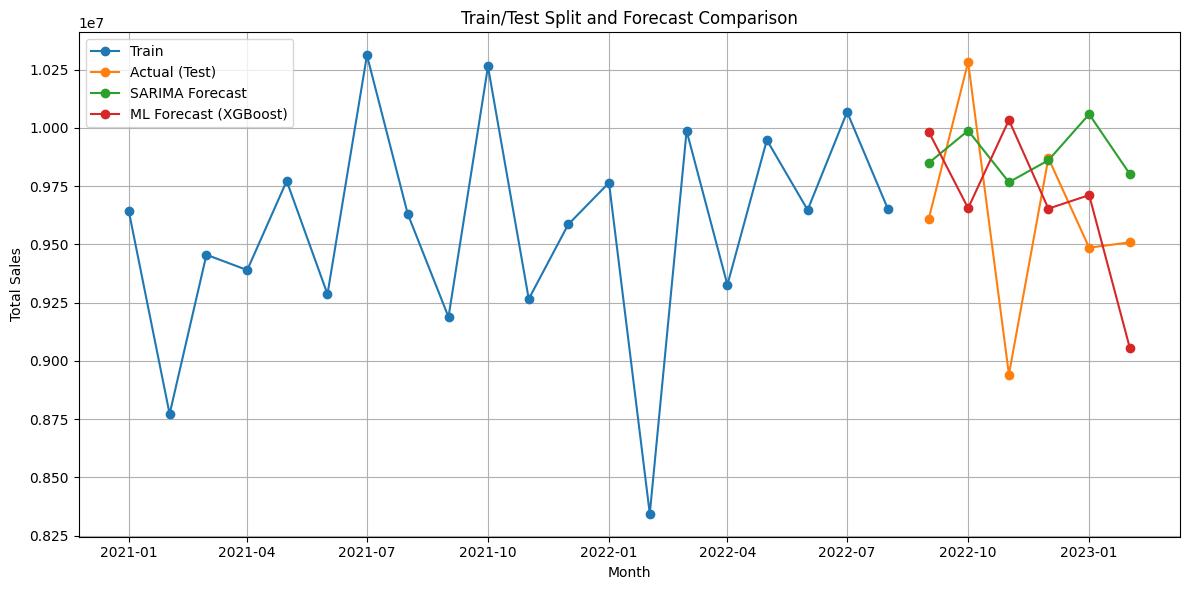

In [58]:
# 4. Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(train['month'], train['sales_amount'], label='Train', marker='o')
plt.plot(test['month'], test['sales_amount'], label='Actual (Test)', marker='o')
plt.plot(sarima_pred.index, sarima_pred, label='SARIMA Forecast', marker='o')
plt.plot(ml_pred.index, ml_pred, label='ML Forecast (XGBoost)', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Train/Test Split and Forecast Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
from sklearn.metrics import root_mean_squared_error

In [60]:
# 5. Evaluation
print("SARIMA RMSE:", root_mean_squared_error(test['sales_amount'], sarima_pred))
print("ML (XGBoost) RMSE:", root_mean_squared_error(test['sales_amount'], ml_pred))

SARIMA RMSE: 454391.32952199946
ML (XGBoost) RMSE: 581796.1280256392


# Making Prediction

<ipython-input-61-c4e48db91e6a>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sarima_future_dates = pd.date_range(start=monthly_sales['month'].iloc[-1] + MonthEnd(1) + timedelta(1), periods=3, freq='M')


SARIMA 3-month forecast:
2023-03-31    9.928490e+06
2023-04-30    9.867751e+06
2023-05-31    9.644173e+06
Freq: ME, Name: predicted_mean, dtype: float64

XGBoost ML 3-month forecast:
2023-03-01    9532632.0
2023-04-01    9551562.0
2023-05-01    9769212.0
dtype: float32


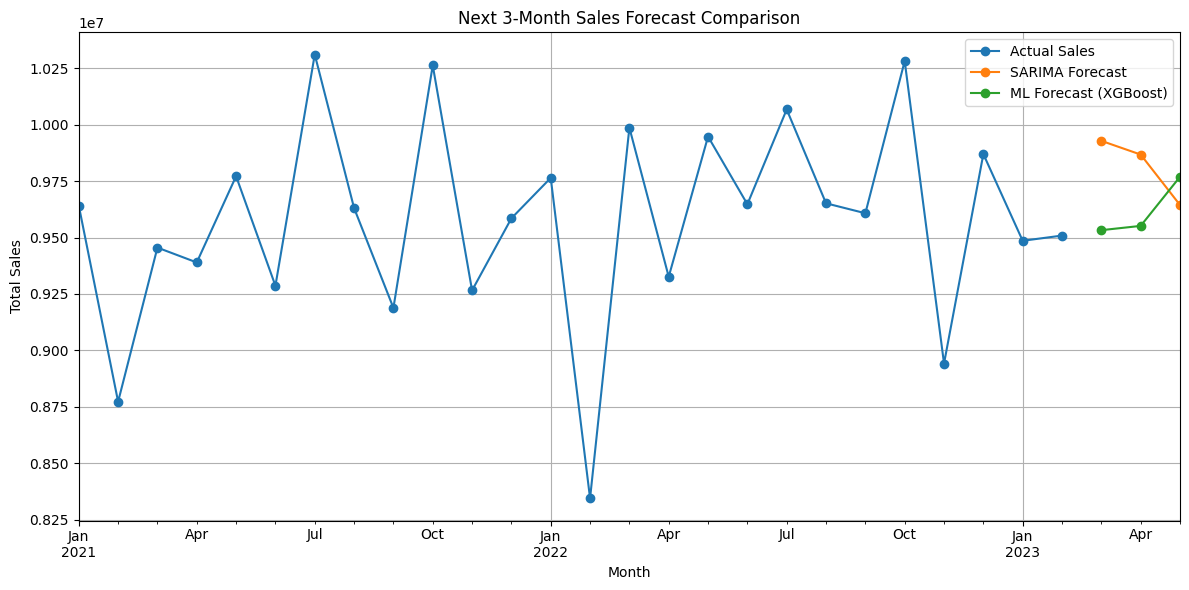

In [61]:
from pandas.tseries.offsets import MonthEnd
from datetime import timedelta

# === 1. Extend SARIMA Forecast ===

# Refit SARIMA on full dataset
full_sarima_model = SARIMAX(monthly_sales['sales_amount'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 3))
full_sarima_results = full_sarima_model.fit()

# Forecast next 3 months
sarima_future = full_sarima_results.get_forecast(steps=3)
sarima_future_values = sarima_future.predicted_mean
sarima_future_dates = pd.date_range(start=monthly_sales['month'].iloc[-1] + MonthEnd(1) + timedelta(1), periods=3, freq='M')
sarima_future_values.index = sarima_future_dates

print("SARIMA 3-month forecast:")
print(sarima_future_values)

# === 2. Extend ML Forecast ===

# Prepare full ML training data
ml_df = monthly_sales.copy()
ml_df['month_num'] = ml_df['month'].dt.month
ml_df['year'] = ml_df['month'].dt.year
ml_df['lag_1'] = ml_df['sales_amount'].shift(1)
ml_df['lag_2'] = ml_df['sales_amount'].shift(2)
ml_df.dropna(inplace=True)

X_full = ml_df[['month_num', 'year', 'lag_1', 'lag_2']]
y_full = ml_df['sales_amount']

# Re-train ML model
ml_model = XGBRegressor()
ml_model.fit(X_full, y_full)

# Predict next 3 months
last_month = ml_df.iloc[-1]['month']
lag_1 = ml_df.iloc[-1]['sales_amount']
lag_2 = ml_df.iloc[-1]['lag_1']
ml_future_preds = []
future_months = []

for i in range(1, 4):
    next_month = (last_month + pd.DateOffset(months=1)).to_period('M').to_timestamp()
    row = {
        'month_num': next_month.month,
        'year': next_month.year,
        'lag_1': lag_1,
        'lag_2': lag_2
    }
    pred = ml_model.predict(pd.DataFrame([row]))[0]
    ml_future_preds.append(pred)
    future_months.append(next_month)

    # Update lags for next iteration
    lag_2 = lag_1
    lag_1 = pred
    last_month = next_month

ml_future_series = pd.Series(ml_future_preds, index=future_months)

print("\nXGBoost ML 3-month forecast:")
print(ml_future_series)

# === 3. Plot Both Forecasts ===
plt.figure(figsize=(12, 6))
monthly_sales.set_index('month')['sales_amount'].plot(label='Actual Sales', marker='o')
sarima_future_values.plot(label='SARIMA Forecast', marker='o')
ml_future_series.plot(label='ML Forecast (XGBoost)', marker='o')
plt.title('Next 3-Month Sales Forecast Comparison')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()